# Logistic regression example
26/10/17

Un simple notebook pour voir comment utiliser la pipeline datasource, model et objective function.

In [1]:
import numpy as np
from xgboost import XGBRegressor
from PBP.datasources import ChunkDS
from PBP.models import LogRegModel, ModelSelection, SKlearnWrapper, ModelSelectionBack
from PBP.objfuncs import Accuracy, Fscore
from sklearn.svm import SVC
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/mrivet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ds_train = ChunkDS(samples=5e5)
ds_train.balance_data()
ds_test = ChunkDS(skip=int(5e5), samples=2e5)
xgbModel = SKlearnWrapper(XGBRegressor(subsample=.5))
LogisticModel = LogRegModel(C=0.0001)
accuracy = Accuracy()
fscore = Fscore()

# Forward Model Selection on Logistic Regressions and Gradient Boosting

In [3]:
forwardSelector_logistic = ModelSelection(LogisticModel, fscore, tqdm=True)
forwardSelector_Boost = ModelSelection(xgbModel, fscore, tqdm=True)

In [4]:
forwardSelector_logistic.fit(ds_train)

A Jupyter Widget

0.633641348637


/home/mrivet/Documents/CS229/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


0
0.280896831975
0.581750671769
0.519293533635
0.634204299656
0.540359006442
0.454778399196
0.519600568194
0.65708908168
0.665668911616
0.515750471757
0.236631597019
0.187582637711
0.279024321805
0.665668911616
0.492778859405
0.526129709424
0.621923509431



A Jupyter Widget

0.642548512594
0.594433471951
0.665668911616
0.597221029053
0.565350128917
0.553659357841
0.622581865107
0.665545922307
0.498882727211
0.654167170679
0.665668911616
0.532116996248
0.665668911616
0.665668911616
0.658636842974
0.665668911616
0.511863867151
0.560990531875
0.631079819358



accuracy for Logistic Regression is : 25.581 %
fscore for Logistic Regression is : 40.741 %


Prediction  0       1
Reality              
0           0  128404
1           0   44139

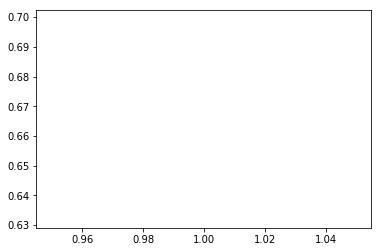

In [5]:
print("accuracy for Logistic Regression is : {:.3f} %"\
      .format(100 * accuracy.evaluate(forwardSelector_logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
print("fscore for Logistic Regression is : {:.3f} %"\
      .format(100 * fscore.evaluate(forwardSelector_logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
forwardSelector_logistic.plot_score_curve()
accuracy.accuracy_matrix(forwardSelector_logistic, ds_test)

In [6]:
forwardSelector_logistic.results

[(0.66566891161553177, 1)]

In [7]:
forwardSelector_Boost.fit(ds_train)

A Jupyter Widget

0.656042254804
0.562682755792
0.280585481984
0.546180903269
0.446146139538


/home/mrivet/Documents/CS229/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


0
0.54191109373
0.454307953971
0.588161974059
0.638938119326
0.548959847892
0.475110200395
0.236554192503
0.186187410465
0.608840257528
0.0487087692926
0.495738116404
0.478467273285
0.62313325945



A Jupyter Widget

0.656042254804
0.649016803958
0.652278287864
0.649876496993
0.64914195481
0.638123435855
0.648778355143
0.644726719322
0.645161071802
0.649703007468
0.643690126279
0.649693522027
0.653110903335
0.653672210924
0.652580939187
0.655584686284
0.652914655598
0.648802019752
0.65066152807



In [8]:
print("accuracy for Gradient Boosting is : {:.3f} %"\
      .format(100 * accuracy.evaluate(forwardSelector_Boost.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
print("fscore for Gradient Boosting is : {:.3f} %"\
      .format(100 * fscore.evaluate(forwardSelector_Boost.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
accuracy.accuracy_matrix(forwardSelector_Boost, ds_test)

accuracy for Gradient Boosting is : 60.035 %
fscore for Gradient Boosting is : 48.276 %


Prediction      0      1
Reality                 
0           71407  56997
1           11959  32180

# Backward selection

In [9]:
backSelector_logistic = ModelSelectionBack(LogisticModel, fscore, tqdm=True)
backSelector_Boost = ModelSelectionBack(xgbModel, fscore, tqdm=True)

In [10]:
backSelector_logistic.fit(ds_train)
backSelector_Boost.fit(ds_train)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

accuracy for Logistic Regression is : 60.368 %
fscore for Logistic Regression is : 47.629 %


Prediction      0      1
Reality                 
0           73064  55340
1           13043  31096

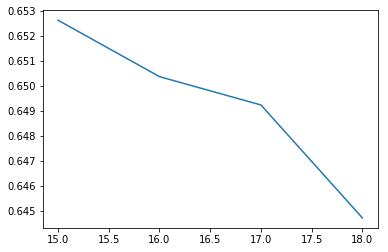

In [11]:
print("accuracy for Logistic Regression is : {:.3f} %"\
      .format(100 * accuracy.evaluate(backSelector_logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
print("fscore for Logistic Regression is : {:.3f} %"\
      .format(100 * fscore.evaluate(backSelector_logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
backSelector_logistic.plot_score_curve()
accuracy.accuracy_matrix(backSelector_logistic, ds_test)

In [12]:
print("accuracy for Gradient Boosting is : {:.3f} %"\
      .format(100 * accuracy.evaluate(backSelector_Boost.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
print("fscore for Gradient Boosting is : {:.3f} %"\
      .format(100 * fscore.evaluate(backSelector_Boost.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
accuracy.accuracy_matrix(backSelector_Boost, ds_test)

accuracy for Gradient Boosting is : 63.081 %
fscore for Gradient Boosting is : 49.530 %


Prediction      0      1
Reality                 
0           77583  50821
1           12881  31258